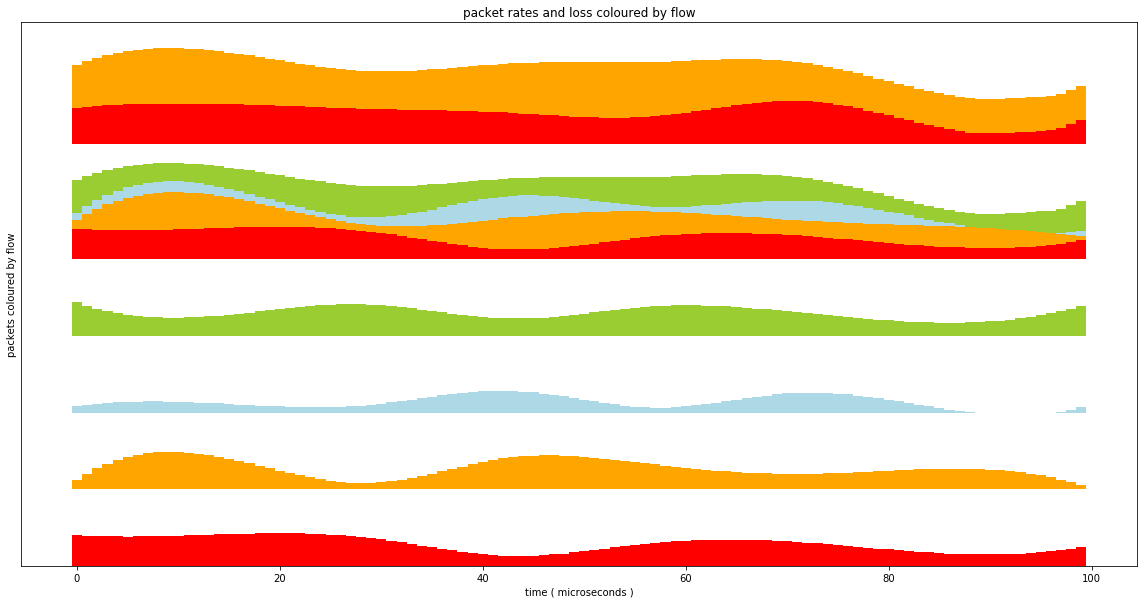

In [27]:
# synthetic model and visualization for precision network telemetry
#
# Yatish Kumar
#
#-------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import CubicSpline

P = 1               # Number of microsecond intervals
N = 4               # Number of flows
B = 100             # Number of microseconds in a single interval
T = B*P             # Total length of time
transitions = 8*P   # Number of times a flow changes each microsecond interval

x = np.arange(transitions)    # the x locations for input to the cubic spline

all_flows = np.zeros((N,T))

for flow in range(N) :
    y   = np.random.rand(transitions)
    cs  = CubicSpline(x,y)
    all_flows[flow] = np.clip(cs(np.arange(0,transitions-1,(transitions-1)/T)),0,100)
    
maxflow = np.zeros((2,T))
for interval in range(T):
    for flow in range(N):
        maxflow[flow % 2][interval] += all_flows[flow][interval]
    
ind = np.arange(T)

width = 1       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(20,10))

colors = ['red','orange','lightblue','yellowgreen','grey','green']

margin_bottom = N*2*np.ones(T)
single_flow_bottom = np.ones(T)
for flow in range(N) :
    aFlow = all_flows[flow]
    plt.bar(ind,aFlow,width,bottom = single_flow_bottom * 2 * flow , color=colors[flow % len(colors)])
    plt.bar(ind,aFlow,width,bottom = margin_bottom, color=colors[flow % len(colors)])

    margin_bottom += aFlow

margin_bottom = 11*np.ones(T)
for flow in range(2) :
    plt.bar(ind,maxflow[flow],width , bottom = margin_bottom , color=colors[flow % len(colors)])
    margin_bottom += maxflow[flow]

plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', 
                    labelleft='off', labeltop='off', labelright='off', labelbottom='on')
plt.ylabel('packets coloured by flow')
plt.xlabel('time ( microseconds )')
plt.title('packet rates and loss coloured by flow')
#plt.legend(p, ('flow 1', 'flow 2' , 'flow 3' , 'flow 4'))

plt.show()